## SIT796 Reinforcement Learning

Credit Task 2.2 - Exploration vs Exploitation  
**Angus Maiden** | ID 220595465

This task evaluates action-value methods of solving a maze that balance exploration and exploitation. If an agent knew the best action to take at each location, then solving a maze would be trivial, as the agent would already know the way. Our agent does not initially know the way to solve the maze, but must discover it through trial-and-error.  


In each state, the agent could explore by taking actions which update the agent's estimate of the value of those actions, or exploit by taking the best action based on it's current information. Since only one action can be taken per step, there is a need to balance this exploration and exploitation. The ε-greedy policy is one such solution explored in this task.  


The policy evaluation code and associated output is demonstrated in this interactive Jupyter Notebook.

In [1]:
# Import the necessary libraries.
import gym
import numpy as np
import matplotlib.pyplot as plt

# Invoke the model maze environment  from Task 1.2C.
env = gym.make('rl_gym_maze:rl-gym-maze-v0')

###  ε-Greedy Policy
This policy sees the agent taking a maximum of 1000 steps to complete the maze, iterated over 2000 episodes.

In [2]:
# Initialise dictionary to store flattened index of (x,y) coordinates.
states = {}
count = 0
for i in range(10):
    for j in range(10):
        states[i, j] = count
        count+=1

# Initialise lists to hold episode rewards and maze completions.
episode_rewards = []
episode_finished = []

# Initialise variables for Q table, N table, epsilon, gamma and number of episodes.
Q = np.zeros((100,4))
N = np.zeros((100,4))
epsilon = 0.1
gamma = 1
episodes = list(range(1,2001))

# For loop for each episode.
for episode in episodes:
    
    # Initialise state, done, and total_episode_reward.
    state = env.reset()
    done = False
    total_episode_reward = 0
    
    # For loop for step iteration.
    for step in range(1000):
        
        # Get Q and N value at current state.
        current_Q = states[state[0], state[1]]
        current_N = states[state[0], state[1]]
        
        # The action is selected randomly between exploition and exploration.
        
        # Exploitation with 1-epsilon probability.
        # This code selects the action with the highest Q value, or random if a tie.
        if np.random.uniform(0,1) > epsilon:
            action = int(np.random.choice(np.flatnonzero(Q[current_Q] == Q[current_Q].max())))
        
        # Exploration with epsilon probability.
        # This code selects a random action.
        else:
            action = env.action_space.sample()
               
        # Get next state, reward and done from Gym model's step() function.
        next_state, reward, done, info = env.step(action)
        
        # Increment N.
        N[current_N, action] += 1
        
        # Increment Q according to the Bellman equation:
        # Q(n+1) = Q(n) + (1/n)(reward-Q(n)).
        Q[current_Q, action] += (1/N[current_N, action])*(reward - gamma*Q[current_Q, action])
        
        # Increment total episode reward.
        total_episode_reward += reward
        
        # If we reach the end of the maze, end the episode.
        if done:
            break
        
        # Update the state variable.
        state = next_state
    
    # Create a variable for calculating and displaying 'Finished maze' statistics.
    if done:
        finished = 'Yes'
    else:
        finished = 'No'
    
    
    # Display end of episode results
    print(
        f'Episode: {episode:4} | Total Reward: {total_episode_reward:5} | '
        f'Finished Maze?: {finished:3}'
    )
    
    # Update episode rewards and maze completions lists.
    episode_rewards.append(total_episode_reward)
    episode_finished.append(finished)

Episode:    1 | Total Reward:    -4 | Finished Maze?: Yes
Episode:    2 | Total Reward:    78 | Finished Maze?: Yes
Episode:    3 | Total Reward:    76 | Finished Maze?: Yes
Episode:    4 | Total Reward:    84 | Finished Maze?: Yes
Episode:    5 | Total Reward:    81 | Finished Maze?: Yes
Episode:    6 | Total Reward:    39 | Finished Maze?: Yes
Episode:    7 | Total Reward:    51 | Finished Maze?: Yes
Episode:    8 | Total Reward:    73 | Finished Maze?: Yes
Episode:    9 | Total Reward:   -51 | Finished Maze?: No 
Episode:   10 | Total Reward:    79 | Finished Maze?: Yes
Episode:   11 | Total Reward:   -35 | Finished Maze?: No 
Episode:   12 | Total Reward:    97 | Finished Maze?: Yes
Episode:   13 | Total Reward:    76 | Finished Maze?: Yes
Episode:   14 | Total Reward:   -42 | Finished Maze?: No 
Episode:   15 | Total Reward:   -40 | Finished Maze?: No 
Episode:   16 | Total Reward:    89 | Finished Maze?: Yes
Episode:   17 | Total Reward:    87 | Finished Maze?: Yes
Episode:   18 

<function matplotlib.pyplot.show(close=None, block=None)>

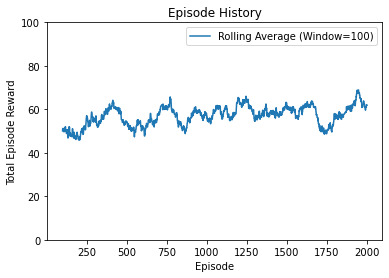

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot the results as a moving average (to see trends).
rolling_episode_rewards = pd.DataFrame(episode_rewards).rolling(100).mean()
plt.plot(rolling_episode_rewards)
plt.title('Episode History')
plt.ylim([0,100])
plt.xlabel('Episode')
plt.ylabel('Total Episode Reward')
plt.legend(['Rolling Average (Window=100)'])
plt.show

###  ε-Greedy Policy (With optimistic initialisation)
The experiment is then repeated with the initial entries in the Q-table set to +1. This is called optimistic initialisation, and causes the agent to explore much more before it begins exploiting.

In [6]:
# Initialise lists to hold episode rewards and maze completions.
episode_rewards_optimistic = []
episode_finished_optimistic = []

# Initialise variables for Q table, N table, epsilon, gamma and number of episodes.
Q = np.full((100,4), 1)
N = np.zeros((100,4))
epsilon = 0.1
gamma = 1
episodes = list(range(1,2001))

# For loop for each episode.
for episode in episodes:
    
    # Initialise state, done, and total_episode_reward.
    state = env.reset()
    done = False
    total_episode_reward = 0
    
    # For loop for step iteration.
    for step in range(1000):
        
        # Get Q and N value at current state.
        current_Q = states[state[0], state[1]]
        current_N = states[state[0], state[1]]
        
        # The action is selected randomly between exploition and exploration.
        
        # Exploitation with 1-epsilon probability.
        # This code selects the action with the highest Q value, or random if a tie.
        if np.random.uniform(0,1) > epsilon:
            action = int(np.random.choice(np.flatnonzero(Q[current_Q] == Q[current_Q].max())))
        
        # Exploration with epsilon probability.
        # This code selects a random action.
        else:
            action = env.action_space.sample()
               
        # Get next state, reward and done from Gym model's step() function.
        next_state, reward, done, info = env.step(action)
        
        # Increment N.
        N[current_N, action] += 1
        
        # Increment Q according to the Bellman equation:
        # Q(n+1) = Q(n) + (1/n)(reward-Q(n)).
        Q[current_Q, action] += (1/N[current_N, action])*(reward - gamma*Q[current_Q, action])
        
        # Increment total episode reward.
        total_episode_reward += reward
        
        # If we reach the end of the maze, end the episode.
        if done:
            break
        
        # Update the state variable.
        state = next_state
    
    # Create a variable for calculating and displaying 'Finished maze' statistics.
    if done:
        finished = 'Yes'
    else:
        finished = 'No'
    
    
    # Display end of episode results.
    print(
        f'Episode: {episode:4} | Total Reward: {total_episode_reward:5} | '
        f'Finished Maze?: {finished:3}'
    )
    
    # Update episode rewards and maze completions lists.
    episode_rewards_optimistic.append(total_episode_reward)
    episode_finished_optimistic.append(finished)

Episode:    1 | Total Reward:  -154 | Finished Maze?: No 
Episode:    2 | Total Reward:    58 | Finished Maze?: Yes
Episode:    3 | Total Reward:    74 | Finished Maze?: Yes
Episode:    4 | Total Reward:    57 | Finished Maze?: Yes
Episode:    5 | Total Reward:   -37 | Finished Maze?: No 
Episode:    6 | Total Reward:    66 | Finished Maze?: Yes
Episode:    7 | Total Reward:    61 | Finished Maze?: Yes
Episode:    8 | Total Reward:    87 | Finished Maze?: Yes
Episode:    9 | Total Reward:    76 | Finished Maze?: Yes
Episode:   10 | Total Reward:    62 | Finished Maze?: Yes
Episode:   11 | Total Reward:    86 | Finished Maze?: Yes
Episode:   12 | Total Reward:    81 | Finished Maze?: Yes
Episode:   13 | Total Reward:    78 | Finished Maze?: Yes
Episode:   14 | Total Reward:    90 | Finished Maze?: Yes
Episode:   15 | Total Reward:    78 | Finished Maze?: Yes
Episode:   16 | Total Reward:    67 | Finished Maze?: Yes
Episode:   17 | Total Reward:    89 | Finished Maze?: Yes
Episode:   18 

<function matplotlib.pyplot.show(close=None, block=None)>

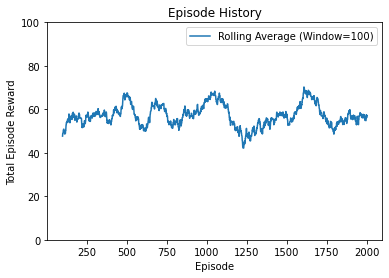

In [7]:
# Plot the results as a moving average (to see trends).
rolling_episode_rewards_optimistic = pd.DataFrame(episode_rewards_optimistic).rolling(100).mean()
plt.plot(rolling_episode_rewards_optimistic)
plt.title('Episode History')
plt.ylim([0,100])
plt.xlabel('Episode')
plt.ylabel('Total Episode Reward')
plt.legend(['Rolling Average (Window=100)'])
plt.show

### Evaluation of the method as a function of 𝜀.

In [12]:
# Initialise lists to hold average episode rewards and percentage maze completions.
average_rewards_epsilon = []
percentage_finished_epsilon = []

# Initialise variables for epsilon, gamma and number of episodes.
epsilon_list = np.arange(0.0, 1.00, .05)
gamma = 1
episodes = list(range(1,1001))

# For loop for iteration over changing epsilon.
for run, e in enumerate(epsilon_list):
    
    # Initialise lists to hold episode rewards and maze completions.
    episode_rewards = []
    episode_finished = []
    
    # Initialise variables for Q table and N table.
    Q = np.zeros((100,4))
    N = np.zeros((100,4))

    # For loop for each episode.
    for episode in episodes:
    
        # Initialise state, done, and total_episode_reward.
        state = env.reset()
        done = False
        total_episode_reward = 0
    
        # For loop for step iteration.
        for step in range(1000):
        
            # Get Q and N value at current state.
            current_Q = states[state[0], state[1]]
            current_N = states[state[0], state[1]]
        
            # The action is selected randomly between exploition and exploration.
        
            # Exploitation with 1-epsilon probability.
            # This code selects the action with the highest Q value, or random if a tie.
            if np.random.uniform(0,1) > e:
                action = int(np.random.choice(np.flatnonzero(Q[current_Q] == Q[current_Q].max())))
        
            # Exploration with epsilon probability.
            # This code selects a random action.
            else:
                action = env.action_space.sample()
        
            # Get next state, reward and done from Gym model's step() function.
            next_state, reward, done, info = env.step(action)
        
            # Increment N.
            N[current_N, action] += 1
        
            # Increment Q according to the Bellman equation:
            # Q(n+1) = Q(n) + (1/n)(reward-Q(n)).
            Q[current_Q, action] += (1/N[current_N, action])*(reward - gamma*Q[current_Q, action])
        
            # Increment total episode reward.
            total_episode_reward += reward
        
            # If we reach the end of the maze, end the episode.
            if done:
                break
            
            # Update the state variable.
            state = next_state
    
        # Create a variable for calculating and displaying 'Finished maze' statistics.
        if done:
            finished = 'Yes'
        else:
            finished = 'No'
        
        # Update episode rewards and maze completions lists.
        episode_rewards.append(total_episode_reward)
        episode_finished.append(finished)
        
    # Calculate average episode reward and percentage maze completions per episode.
    episode_average_reward = np.sum(episode_rewards)/len(episodes)       
    episode_finished_percentage = np.count_nonzero(np.array(episode_finished) == 'Yes')*100/len(episodes)
    
    # Update average episode rewards and percentage maze completions list.
    average_rewards_epsilon.append(episode_average_reward)
    percentage_finished_epsilon.append(episode_finished_percentage)

    # Display end of run results.
    print(
        f'Run: {run+1:4} | Epsilon: {e:4.2f} | Average Episode Reward: {episode_average_reward:7.2f} | '
        f'Percentage Finished: {episode_finished_percentage:5.2f}'
    )

Run:    1 | Epsilon: 0.00 | Average Episode Reward:   80.62 | Percentage Finished: 80.80
Run:    2 | Epsilon: 0.05 | Average Episode Reward:   67.36 | Percentage Finished: 78.80
Run:    3 | Epsilon: 0.10 | Average Episode Reward:   57.14 | Percentage Finished: 79.80
Run:    4 | Epsilon: 0.15 | Average Episode Reward:   43.25 | Percentage Finished: 78.70
Run:    5 | Epsilon: 0.20 | Average Episode Reward:   33.27 | Percentage Finished: 78.80
Run:    6 | Epsilon: 0.25 | Average Episode Reward:   18.14 | Percentage Finished: 77.90
Run:    7 | Epsilon: 0.30 | Average Episode Reward:    5.99 | Percentage Finished: 77.80
Run:    8 | Epsilon: 0.35 | Average Episode Reward:  -18.15 | Percentage Finished: 70.90
Run:    9 | Epsilon: 0.40 | Average Episode Reward:  -24.09 | Percentage Finished: 75.20
Run:   10 | Epsilon: 0.45 | Average Episode Reward:  -48.58 | Percentage Finished: 69.90
Run:   11 | Epsilon: 0.50 | Average Episode Reward:  -65.27 | Percentage Finished: 69.60
Run:   12 | Epsilon: 

<function matplotlib.pyplot.show(close=None, block=None)>

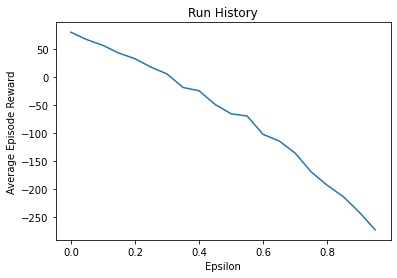

In [13]:
# Plot the average episode reward against epsilon.
plt.plot(epsilon_list,average_rewards_epsilon)
plt.title('Run History')
plt.xlabel('Epsilon')
plt.ylabel('Average Episode Reward')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

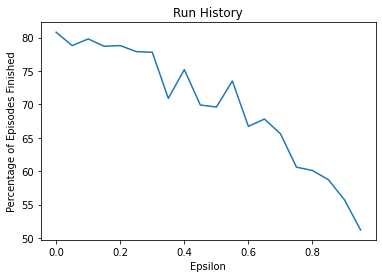

In [14]:
# Plot the percentage of completions against epsilon.
plt.plot(epsilon_list,percentage_finished_epsilon)
plt.title('Run History')
plt.xlabel('Epsilon')
plt.ylabel('Percentage of Episodes Finished')
plt.show

### Evaluation of the method as a function of 𝛾.

In [17]:
# Initialise lists to hold average episode rewards and percentage maze completions.
average_rewards_gamma = []
percentage_finished_gamma = []

# Initialise variables for epsilon, gamma and number of episodes.
gamma_list = np.arange(1.00, 0.00, -.05)
epsilon = 0.1
episodes = list(range(1,1001))

# For loop for iteration over changing epsilon.
for run, g in enumerate(gamma_list):
    
    # Initialise lists to hold episode rewards and maze completions.
    episode_rewards = []
    episode_finished = []
    
    # Initialise variables for Q table and N table.
    Q = np.zeros((100,4))
    N = np.zeros((100,4))

    # For loop for each episode.
    for episode in episodes:
    
        # Initialise state, done, and total_episode_reward.
        state = env.reset()
        done = False
        total_episode_reward = 0
    
        # For loop for step iteration.
        for step in range(1000):
        
            # Get Q and N value at current state.
            current_Q = states[state[0], state[1]]
            current_N = states[state[0], state[1]]
        
            # The action is selected randomly between exploition and exploration.
        
            # Exploitation with 1-epsilon probability.
            # This code selects the action with the highest Q value, or random if a tie.
            if np.random.uniform(0,1) > epsilon:
                action = int(np.random.choice(np.flatnonzero(Q[current_Q] == Q[current_Q].max())))
        
            # Exploration with epsilon probability.
            # This code selects a random action.
            else:
                action = env.action_space.sample()
        
            # Get next state, reward and done from Gym model's step() function.
            next_state, reward, done, info = env.step(action)
        
            # Increment N.
            N[current_N, action] += 1
        
            # Increment Q according to the Bellman equation:
            # Q(n+1) = Q(n) + (1/n)(reward-Q(n)).
            Q[current_Q, action] += (1/N[current_N, action])*(reward - g*Q[current_Q, action])
        
            # Increment total episode reward.
            total_episode_reward += reward
        
            # If we reach the end of the maze, end the episode
            if done:
                break
            
            # Update the state variable.
            state = next_state
    
        # Create a variable for calculating and displaying 'Finished maze' statistics.
        if done:
            finished = 'Yes'
        else:
            finished = 'No'
        
        # Update episode rewards and maze completions lists.
        episode_rewards.append(total_episode_reward)
        episode_finished.append(finished)
        
    # Calculate average episode reward and percentage maze completions per episode.
    episode_average_reward = np.sum(episode_rewards)/len(episodes)
    episode_finished_percentage = np.count_nonzero(np.array(episode_finished) == 'Yes')*100/len(episodes)
    
    # Update average episode rewards and percentage maze completions list.
    average_rewards_gamma.append(episode_average_reward)
    percentage_finished_gamma.append(episode_finished_percentage)

    # Display end of run results.
    print(
        f'Run: {run+1:4} | Gamma: {g:4.2f} | Average Episode Reward: {episode_average_reward:7.2f} | '
        f'Percentage Finished: {episode_finished_percentage:5.2f}'
    )

Run:    1 | Gamma: 1.00 | Average Episode Reward:   55.17 | Percentage Finished: 78.60
Run:    2 | Gamma: 0.95 | Average Episode Reward:   57.47 | Percentage Finished: 79.80
Run:    3 | Gamma: 0.90 | Average Episode Reward:   57.19 | Percentage Finished: 79.80
Run:    4 | Gamma: 0.85 | Average Episode Reward:   60.05 | Percentage Finished: 81.70
Run:    5 | Gamma: 0.80 | Average Episode Reward:   56.86 | Percentage Finished: 79.60
Run:    6 | Gamma: 0.75 | Average Episode Reward:   54.12 | Percentage Finished: 77.30
Run:    7 | Gamma: 0.70 | Average Episode Reward:   58.00 | Percentage Finished: 80.30
Run:    8 | Gamma: 0.65 | Average Episode Reward:   58.22 | Percentage Finished: 80.70
Run:    9 | Gamma: 0.60 | Average Episode Reward:   56.09 | Percentage Finished: 79.50
Run:   10 | Gamma: 0.55 | Average Episode Reward:   57.43 | Percentage Finished: 80.00
Run:   11 | Gamma: 0.50 | Average Episode Reward:   59.35 | Percentage Finished: 81.20
Run:   12 | Gamma: 0.45 | Average Episode R

<function matplotlib.pyplot.show(close=None, block=None)>

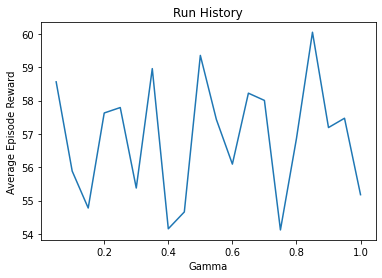

In [18]:
# Plot the results.
plt.plot(gamma_list,average_rewards_gamma)
plt.title('Run History')
plt.xlabel('Gamma')
plt.ylabel('Average Episode Reward')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

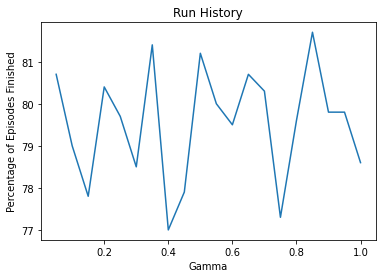

In [19]:
plt.plot(gamma_list, percentage_finished_gamma)
plt.title('Run History')
plt.xlabel('Gamma')
plt.ylabel('Percentage of Episodes Finished')
plt.show